In [1]:
import pandas as pd

# Ordenando y unificando headers

In [2]:
df_educacion = pd.read_csv('datos/raw/fiuba_1_postulantes_educacion.csv')

# Me quedo solo con los graduados
df_educacion = df_educacion[df_educacion['estado'] == 'Graduado']

df_educacion.columns = ['id_postulante', 'titulo', 'estado']
df_educacion.head()

,id_postulante,titulo,estado
670,NM5M,Secundario,Graduado
671,5awk,Universitario,Graduado
672,5awk,Terciario/Técnico,Graduado
673,ZaO5,Terciario/Técnico,Graduado
674,NdJl,Universitario,Graduado


Me quedo con el titulo mas importante de cada persona

In [3]:
# Orden de los niveles educativos
educacion_nivel = ['Posgrado', 'Doctorado', 'Master', 'Universitario', 'Terciario/Técnico', 'Otro', 'Secundario']

d = []

for id_postulante, group in df_educacion.groupby('id_postulante'):    
    titulos = [0 for _ in educacion_nivel]
    
    # Ordeno todos los titulos que tenga la persona
    for i in group['titulo'].tolist():
        index = educacion_nivel.index(i)
        titulos[index] = 1
        
    # Me quedo con el mas importante
    d.append([id_postulante, educacion_nivel[titulos.index(1)]])

In [8]:
df_educacion = pd.DataFrame(d, columns=['id_postulante', 'titulo'])
df_educacion.head()

,id_postulante,titulo
0,0z5VvGv,Secundario
1,0zB026d,Terciario/Técnico
2,0zB03O9,Secundario
3,0zB08lq,Secundario
4,0zB0NWY,Universitario


In [5]:
df_edad = pd.read_csv('datos/raw//fiuba_2_postulantes_genero_y_edad.csv')
df_edad['fechanacimiento'] = pd.to_datetime(df_edad['fechanacimiento'], errors='coerce')
df_edad['edad'] = df_edad['fechanacimiento'].apply(lambda x: 2018 - x.year)
df_edad.columns = ['id_postulante', 'fecha_nacimiento', 'sexo', 'edad']

df_edad.head()

,id_postulante,fecha_nacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,48.0
1,5awk,1962-12-04,FEM,56.0
2,ZaO5,1978-08-10,FEM,40.0
3,NdJl,1969-05-09,MASC,49.0
4,eo2p,1981-02-16,MASC,37.0


In [10]:
df_personas = pd.merge(df_edad, df_educacion, how='left', on='id_postulante')
df_personas.head()

,id_postulante,fecha_nacimiento,sexo,edad,titulo
0,NM5M,1970-12-03,FEM,48.0,Secundario
1,5awk,1962-12-04,FEM,56.0,Universitario
2,ZaO5,1978-08-10,FEM,40.0,Terciario/Técnico
3,NdJl,1969-05-09,MASC,49.0,Universitario
4,eo2p,1981-02-16,MASC,37.0,Master


In [11]:
df_personas['edad'].min(), df_personas['edad'].max()

(12.0, 243.0)

In [12]:
df_personas.to_csv('datos/personas.csv', index=False)

In [13]:
df_vistas = pd.read_csv('datos/raw/fiuba_3_vistas.csv')
df_vistas['timestamp'] = pd.to_datetime(df_vistas['timestamp'], errors='coerce')

# Ordenando un poco
df_vistas = df_vistas[['idpostulante', 'idAviso', 'timestamp']]
df_vistas.columns = ['id_postulante', 'id_aviso', 'fecha']

df_vistas.head()

,id_postulante,id_aviso,fecha
0,YjVJQ6Z,1111780242,2018-02-23 18:38:13.187
1,BmVpYoR,1112263876,2018-02-23 18:38:14.296
2,wVkBzZd,1112327963,2018-02-23 18:38:14.329
3,OqmP9pv,1112318643,2018-02-23 18:38:17.921
4,DrpbXDP,1111903673,2018-02-23 18:38:18.973


In [14]:
df_vistas['fecha'].min(), df_vistas['fecha'].max()

(Timestamp('2018-02-23 18:38:10.808000'),
 Timestamp('2018-03-01 04:59:56.812000'))

In [15]:
df_vistas.to_csv('datos/vistas.csv', index=False)

In [17]:
df_postulaciones = pd.read_csv('datos/raw/fiuba_4_postulaciones.csv')
df_postulaciones['fechapostulacion'] = pd.to_datetime(df_postulaciones['fechapostulacion'], errors='coerce')

# Ordenando
df_postulaciones = df_postulaciones[['idpostulante', 'idaviso', 'fechapostulacion']]
df_postulaciones.columns = ['id_postulante', 'id_aviso', 'fecha']

df_postulaciones.head()

,id_postulante,id_aviso,fecha
0,NM5M,1112257047,2018-01-15 16:22:34
1,NM5M,1111920714,2018-02-06 09:04:50
2,NM5M,1112346945,2018-02-22 09:04:47
3,NM5M,1112345547,2018-02-22 09:04:59
4,5awk,1112237522,2018-01-25 18:55:03


In [18]:
df_postulaciones['fecha'].min(), df_postulaciones['fecha'].max()

(Timestamp('2018-01-15 00:00:01'), Timestamp('2018-02-28 23:59:55'))

In [19]:
df_postulaciones.to_csv('datos/postulaciones.csv', index=False)

In [21]:
df_avisos = pd.read_csv('datos/raw/fiuba_6_avisos_detalle.csv')
df_avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Fechas de las postulaciones

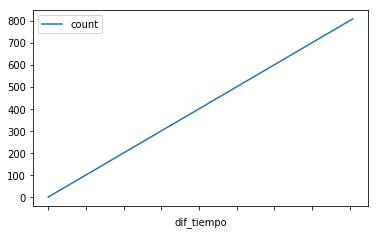

In [129]:
df_p.plot(x='dif_tiempo', y='count')

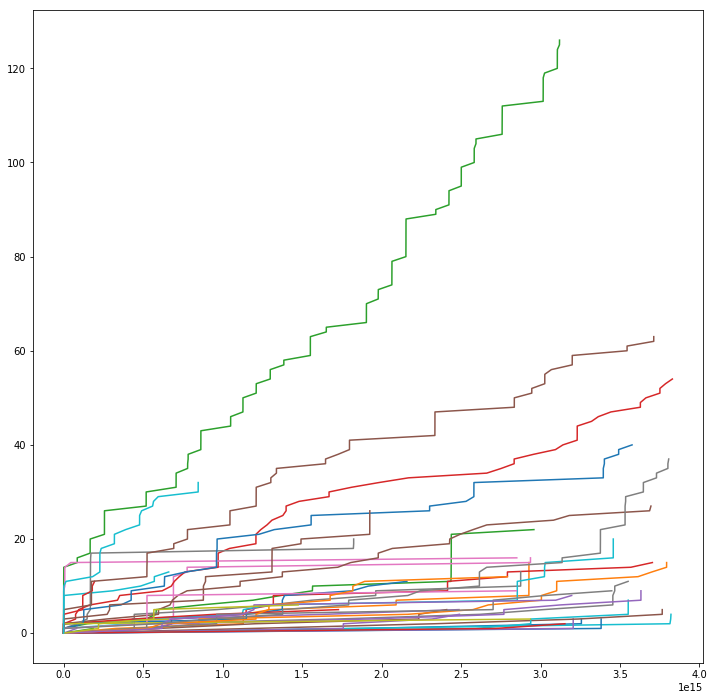

In [132]:
plt.figure(figsize=(12, 12))

for persona in df_postulaciones['id_postulante'].unique()[:50]:
    df_p = df_postulaciones[df_postulaciones['id_postulante'] == persona]
    df_p = df_p.sort_values('fecha')
    df_p['dif_tiempo'] = df_p['fecha'] - df_p['fecha'].iloc[0]
    df_p['count'] = [i for i in range(df_p.shape[0])]
    
    plt.plot(df_p['dif_tiempo'], df_p['count'])
    
plt.show()